In [1]:
#importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
file_path = r'C:\Users\disha\Downloads\clinical.xls.csv' 
df = pd.read_csv(file_path)
print(f" File Loaded. Shape: {df.shape}\n")

 File Loaded. Shape: (107, 40)



In [3]:
print(df.columns)

Index(['Case ID', 'Patient affiliation', 'Age at Histological Diagnosis',
       'Weight (lbs)', 'Gender', 'Ethnicity', 'Smoking status', 'Pack Years',
       'Quit Smoking Year', '%GG', 'Tumor Location (choice=RUL)',
       'Tumor Location (choice=RML)', 'Tumor Location (choice=RLL)',
       'Tumor Location (choice=LUL)', 'Tumor Location (choice=LLL)',
       'Tumor Location (choice=L Lingula)', 'Tumor Location (choice=Unknown)',
       'Histology', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Histopathological Grade',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Recurrence Location', 'Date of Recurrence',
       'Date of Last Known Alive', 'Survival Status', 'Date of Death',
       'Time to Death (days)', 'CT Date', 'Days between CT and surg

In [4]:
#replacing other labels of recurrence with yes/no only
df["Recurrence"] = df["Recurrence"].astype(str).str.strip().str.lower()
df["Recurrence"] = df["Recurrence"].replace({
    "yes": 1,
    "no": 0,
    "not collected": 0,
    "nan": 0,
    "": 0
})

In [5]:
df["Ethnicity"].value_counts()

Ethnicity
Caucasian                           93
Asian                                9
Hispanic/Latino                      2
African-American                     2
Native Hawaiian/Pacific Islander     1
Name: count, dtype: int64

In [6]:
df["Lymphovascular invasion"].value_counts()

Lymphovascular invasion
unknown    52
Absent     50
Present     5
Name: count, dtype: int64

In [7]:
df["Radiation"].value_counts()
#replacing Not checked with No
df["Radiation"]=df["Radiation"].replace("Not Collected","No")
df["Radiation"].value_counts()

Radiation
No     94
Yes    13
Name: count, dtype: int64

In [8]:
df["Chemotherapy"].value_counts()
#replacing Not checked with No
df["Chemotherapy"]=df["Chemotherapy"].replace("Not Collected","No")
df["Chemotherapy"].value_counts()

Chemotherapy
No     80
Yes    27
Name: count, dtype: int64

In [9]:
df["EGFR mutation status"].value_counts()
#replacing Not checked with No
df["EGFR mutation status"]=df["EGFR mutation status"].replace("Not collected","Wildtype")
df["EGFR mutation status"]=df["EGFR mutation status"].replace("Unknown","Wildtype")
df["EGFR mutation status"].value_counts()

EGFR mutation status
Wildtype    80
Mutant      27
Name: count, dtype: int64

In [10]:
df["KRAS mutation status"].value_counts()
#replacing Not checked with No
df["KRAS mutation status"]=df["KRAS mutation status"].replace("Not collected","Wildtype")
df["KRAS mutation status"]=df["KRAS mutation status"].replace("Unknown","Wildtype")
df["KRAS mutation status"].value_counts()

KRAS mutation status
Wildtype    88
Mutant      19
Name: count, dtype: int64

In [11]:
df["ALK translocation status"].value_counts()
#replacing Not checked with No
df["ALK translocation status"]=df["ALK translocation status"].replace("Not collected","Wildtype")
df["ALK translocation status"]=df["ALK translocation status"].replace("Unknown","Wildtype")
df["ALK translocation status"].value_counts()


ALK translocation status
Wildtype        106
Translocated      1
Name: count, dtype: int64

In [12]:
df["Histology"].value_counts()
df["Histology"]=df["Histology"].replace("NSCLC NOS (not otherwise specified)","Adenocarcinoma")
df["Histology"].value_counts()

Histology
Adenocarcinoma             99
Squamous cell carcinoma     8
Name: count, dtype: int64

In [13]:
df["Pathological T stage"].value_counts()
df["Pathological T stage"]=df["Pathological T stage"].replace("Not Collected","Unknown")
df["Pathological T stage"].value_counts()

Pathological T stage
Unknown    49
T2a        15
T1a        12
T1b        10
T3          9
T4          4
Tis         4
T2b         4
Name: count, dtype: int64

In [14]:
df["Gender"].value_counts()
#df["Gender"]=df["Gender"].replace("Not Collected","No")
#df["Gender"].value_counts()

Gender
Male      56
Female    51
Name: count, dtype: int64

In [15]:
df["Pathological M stage"].value_counts()

Pathological M stage
M0     53
M1c    49
M1b     4
M1a     1
Name: count, dtype: int64

In [16]:
df["Pleural invasion (elastic, visceral, or parietal)"].value_counts()
df["Pleural invasion (elastic, visceral, or parietal)"]=df["Pleural invasion (elastic, visceral, or parietal)"].replace("Not collected","No")
df["Pleural invasion (elastic, visceral, or parietal)"].value_counts()

Pleural invasion (elastic, visceral, or parietal)
No     90
Yes    17
Name: count, dtype: int64

In [17]:
df["Adjuvant Treatment"].value_counts()
df["Adjuvant Treatment"]=df["Adjuvant Treatment"].replace("Not Collected","No")
df["Adjuvant Treatment"].value_counts()

Adjuvant Treatment
No     80
Yes    27
Name: count, dtype: int64

In [18]:
#data preprocessing
# Define the mapping
smoking_status_mapping = {'Nonsmoker': 0, 'Former': 1, 'Current': 2}
# Apply the mapping to the 'Smoking status' column
df['Smoking status'] =df['Smoking status'].map(smoking_status_mapping)

In [19]:
#initializing the label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [20]:
df['Radiation']= label_encoder.fit_transform(df['Radiation'])
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Survival Status']= label_encoder.fit_transform(df['Survival Status'])
df['Chemotherapy']= label_encoder.fit_transform(df['Chemotherapy'])
df['Histology']= label_encoder.fit_transform(df['Histology'])
df["Pleural invasion (elastic, visceral, or parietal)"]=label_encoder.fit_transform(df["Pleural invasion (elastic, visceral, or parietal)"])
df["ALK translocation status"]=label_encoder.fit_transform(df["ALK translocation status"])
df["KRAS mutation status"]=label_encoder.fit_transform(df["KRAS mutation status"])
df["EGFR mutation status"]=label_encoder.fit_transform(df["EGFR mutation status"])
df["Adjuvant Treatment"]=label_encoder.fit_transform(df["Adjuvant Treatment"])
print("label encoding is done")

label encoding is done


In [21]:
df["Pleural invasion (elastic, visceral, or parietal)"].value_counts()

Pleural invasion (elastic, visceral, or parietal)
0    90
1    17
Name: count, dtype: int64

In [22]:
df["Histology"].value_counts()

Histology
0    99
1     8
Name: count, dtype: int64

In [23]:
df["Chemotherapy"].value_counts()

Chemotherapy
0    80
1    27
Name: count, dtype: int64

In [24]:
#drop leakage and unnecessary columns
df=df.drop(columns=['Survival Status','Pack Years','Quit Smoking Year','Histopathological Grade', "CT Date", "PET Date","Weight (lbs)","%GG","Tumor Location (choice=RML)", "Tumor Location (choice=RLL)", "Tumor Location (choice=LUL)", "Tumor Location (choice=LLL)", "Tumor Location (choice=L Lingula)", "Tumor Location (choice=RUL)","Tumor Location (choice=Unknown)"])# Drop unnecessary columns
df = df[df["Recurrence"].isin([0, 1])]
leak_cols = [
    "Date of Recurrence", "Recurrence Location", "Date of Death",
    "Date of Last Known Alive", "Time to Death (days)"]
df = df.drop(columns=[c for c in leak_cols if c in df.columns], errors="ignore")


In [25]:
# Drop identifier columns
id_cols = ["case id", "Patient affiliation"]
df = df.drop(columns=[c for c in id_cols if c in df.columns], errors="ignore")

In [26]:
# Drop unnecessary ID/date columns
drop_cols = [c for c in df.columns if "date" in c.lower() or "id" in c.lower()]
df = df.drop(columns=drop_cols, errors="ignore")

In [27]:
print(df.shape)
print(df.columns)

(107, 18)
Index(['Age at Histological Diagnosis', 'Gender', 'Ethnicity',
       'Smoking status', 'Histology', 'Pathological T stage',
       'Pathological N stage', 'Pathological M stage',
       'Lymphovascular invasion',
       'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Recurrence', 'Days between CT and surgery'],
      dtype='object')


In [28]:
# Separate X and y
X = df.drop(columns=["Recurrence"])
y = df["Recurrence"]

# Convert all column names to string for safety
X.columns = X.columns.astype(str)

In [29]:
# Convert categorical columns to string before encoding
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns
# Fill missing values
for col in cat_cols:
    X[col] = X[col].fillna("Unknown")

for col in num_cols:
    X[col] = X[col].fillna(X[col].median())
print(cat_cols)
print(num_cols)

Index(['Ethnicity', 'Pathological T stage', 'Pathological N stage',
       'Pathological M stage', 'Lymphovascular invasion'],
      dtype='object')
Index(['Age at Histological Diagnosis', 'Gender', 'Smoking status',
       'Histology', 'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Days between CT and surgery'],
      dtype='object')


In [30]:
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
import joblib
import pickle
joblib.dump(X_train.columns.tolist(), "feature_names1.pkl")
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [33]:
# assuming scaler variable name is `scaler`
with open("scaler1.pkl", "wb") as file:
    pickle.dump(scaler, file)

print("Scaler saved successfully!")


print(X.columns)

Scaler saved successfully!
Index(['Age at Histological Diagnosis', 'Gender', 'Smoking status',
       'Histology', 'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Days between CT and surgery', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic/Latino',
       'Ethnicity_Native Hawaiian/Pacific Islander',
       'Pathological T stage_T1b', 'Pathological T stage_T2a',
       'Pathological T stage_T2b', 'Pathological T stage_T3',
       'Pathological T stage_T4', 'Pathological T stage_Tis',
       'Pathological T stage_Unknown', 'Pathological N stage_N1',
       'Pathological N stage_N2', 'Pathological M stage_M1a',
       'Pathological M stage_M1b', 'Pathological M stage_M1c',
       'Lymphovascular invasion_Present', 'Lymphovascular invasion_unknown'],
      dtype='object')


In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, classification_report, confusion_matrix
)

# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=35,
    reg_alpha=0.2,
    reg_lambda=1.5,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
# Predictions
y_pred = xgb_model.predict(X_test)
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]

# Train predictions for checking overfitting
y_train_pred = xgb_model.predict(X_train)
y_train_prob = xgb_model.predict_proba(X_train)[:, 1]

# Train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

In [36]:
# Test metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

In [37]:
print("Train Accuracy:", train_accuracy)
print("Test Accuracy :", acc)
print("Precision     :", prec)
print("Recall        :", rec)
print("F1 Score      :", f1)
print("ROC-AUC Score :", auc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Train Accuracy: 0.8941176470588236
Test Accuracy : 0.8181818181818182
Precision     : 0.8181818181818182
Recall        : 0.8181818181818182
F1 Score      : 0.8181818181818182
ROC-AUC Score : 0.8099173553719008

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.82      0.82      0.82        11

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.82      0.82      0.82        22


Confusion Matrix:
[[9 2]
 [2 9]]


In [38]:
#Optimising the xgboost model with hyper parameter tuning to eliminate overfitting/to generalize the model
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

param_dist = {
    "n_estimators": [100,200, 300, 400],
    "max_depth": [2, 3, 4,5],
    "learning_rate": [0.001,0.01, 0.05, 0.1],
    "subsample": [0.6, 0.7, 0.8,1.0],
    "colsample_bytree": [0.6, 0.7, 0.8,1.0],
    "gamma": [0, 0.1,0.2,0.3],
    "min_child_weight": [1, 2,3,4],
    "reg_alpha": [0, 0.01,0.1,1],
    "reg_lambda": [0.1,1,5,10]
}

In [39]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,                   # number of combinations to try
    scoring='roc_auc',           
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None...
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.1, 1, 5, 10],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [41]:
print("\nBest Parameters:")
print(random_search.best_params_)

print("\nBest Cross-Validation AUC Score:")
print(random_search.best_score_)


Best Parameters:
{'subsample': 0.6, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.6}

Best Cross-Validation AUC Score:
0.8527777777777779


In [42]:
best_xgb = random_search.best_estimator_
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.3,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [43]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
y_train_prob=random_search.predict(X_train)
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]
train_accuracy=accuracy_score(y_train, y_train_prob)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test AUC:", roc_auc_score(y_test, y_prob))
print(f"trainacc:{train_accuracy*100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8181818181818182
Test AUC: 0.8264462809917356
trainacc:82.35%

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.82      0.82      0.82        11

    accuracy                           0.82        22
   macro avg       0.82      0.82      0.82        22
weighted avg       0.82      0.82      0.82        22



In [44]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5)
print("CV Mean:", cv_scores.mean())
print("CV Std:", cv_scores.std())

CV Mean: 0.8235294117647058
CV Std: 0.05261336417646565


<Figure size 600x500 with 0 Axes>

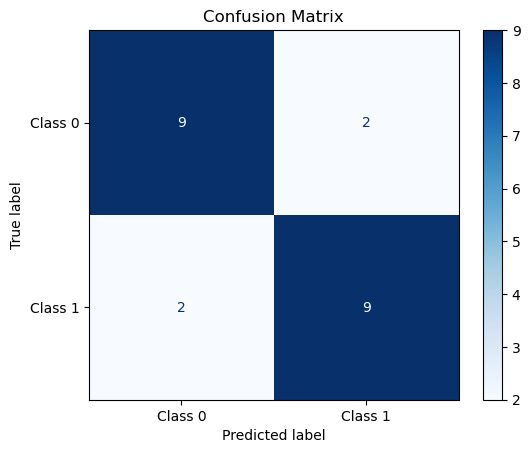

In [45]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(values_format='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

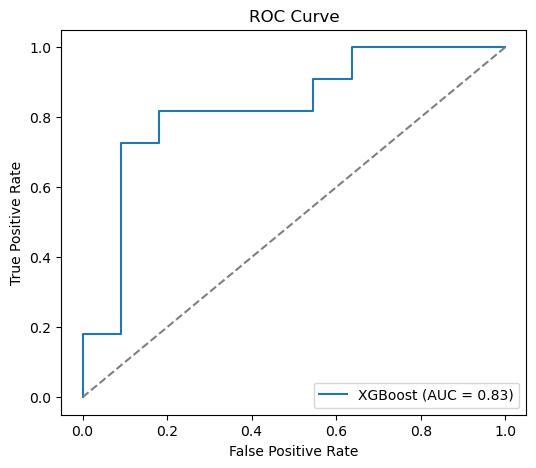

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # baseline reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [47]:
# Save model
joblib.dump(best_xgb, "xgb_model_final.pkl")

['xgb_model_final.pkl']

In [48]:
import numpy as np
import pandas as pd
import joblib

model = joblib.load("xgb_model_final.pkl")

importances = model.feature_importances_


In [49]:
encoded_columns = ['Age at Histological Diagnosis', 'Gender', 'Smoking status',
       'Histology', 'Pleural invasion (elastic, visceral, or parietal)',
       'EGFR mutation status', 'KRAS mutation status',
       'ALK translocation status', 'Adjuvant Treatment', 'Chemotherapy',
       'Radiation', 'Days between CT and surgery', 'Ethnicity_Asian',
       'Ethnicity_Caucasian', 'Ethnicity_Hispanic/Latino',
       'Ethnicity_Native Hawaiian/Pacific Islander',
       'Pathological T stage_T1b', 'Pathological T stage_T2a',
       'Pathological T stage_T2b', 'Pathological T stage_T3',
       'Pathological T stage_T4', 'Pathological T stage_Tis',
       'Pathological T stage_Unknown', 'Pathological N stage_N1',
       'Pathological N stage_N2', 'Pathological M stage_M1a',
       'Pathological M stage_M1b', 'Pathological M stage_M1c',
       'Lymphovascular invasion_Present', 'Lymphovascular invasion_unknown']


In [50]:
feature_groups = {
    "Age at Histological Diagnosis": ['Age at Histological Diagnosis'],

    "Gender": ['Gender'],

    "Smoking status": ['Smoking status'],

    "Quit Smoking Year": ['Quit Smoking Year'],

    "Histology": [
        'Histology'
    ],

    "Chemotherapy": ['Chemotherapy'],

    "Radiation": ['Radiation'],

    "Days between CT and surgery": ['Days between CT and surgery'],

    "Ethnicity": [
        'Ethnicity_Asian', 
        'Ethnicity_Caucasian', 
        'Ethnicity_Hispanic/Latino',
        'Ethnicity_Native Hawaiian/Pacific Islander'
        'Ethnicity_African-American'
    ],

   

    "Pathological T Stage": [
        col for col in encoded_columns if col.startswith("Pathological T stage_")
    ],

    "Pathological N Stage": [
        col for col in encoded_columns if col.startswith("Pathological N stage_")
    ],

    "Pathological M Stage": [
        col for col in encoded_columns if col.startswith("Pathological M stage_")
    ],

    "Lymphovascular invasion": [
        col for col in encoded_columns if col.startswith("Lymphovascular invasion_")
    ],

    "Pleural invasion (elastic, visceral, or parietal)": [
        'Pleural invasion (elastic, visceral, or parietal)'
       
    ],
     "EGFR mutation status": [
        'EGFR mutation status'
       
    ],

    "KRAS mutation status": [
        'EGFR mutation status'
       
    ],
    "ALK mutation status": [
        'EGFR mutation status'
       
    ],

    "Adjuvant Treatment": [
        'Adjuvant Treatment'
    ]
}


                                     Original Feature  Importance
11                               Pathological M Stage    0.292055
9                                Pathological T Stage    0.151800
12                            Lymphovascular invasion    0.134695
17                                 Adjuvant Treatment    0.075230
13  Pleural invasion (elastic, visceral, or parietal)    0.074592
1                                              Gender    0.060804
5                                        Chemotherapy    0.056103
2                                      Smoking status    0.046152
16                                ALK mutation status    0.043004
15                               KRAS mutation status    0.043004
14                               EGFR mutation status    0.043004
7                         Days between CT and surgery    0.036076
0                       Age at Histological Diagnosis    0.029488
4                                           Histology    0.000000
8         

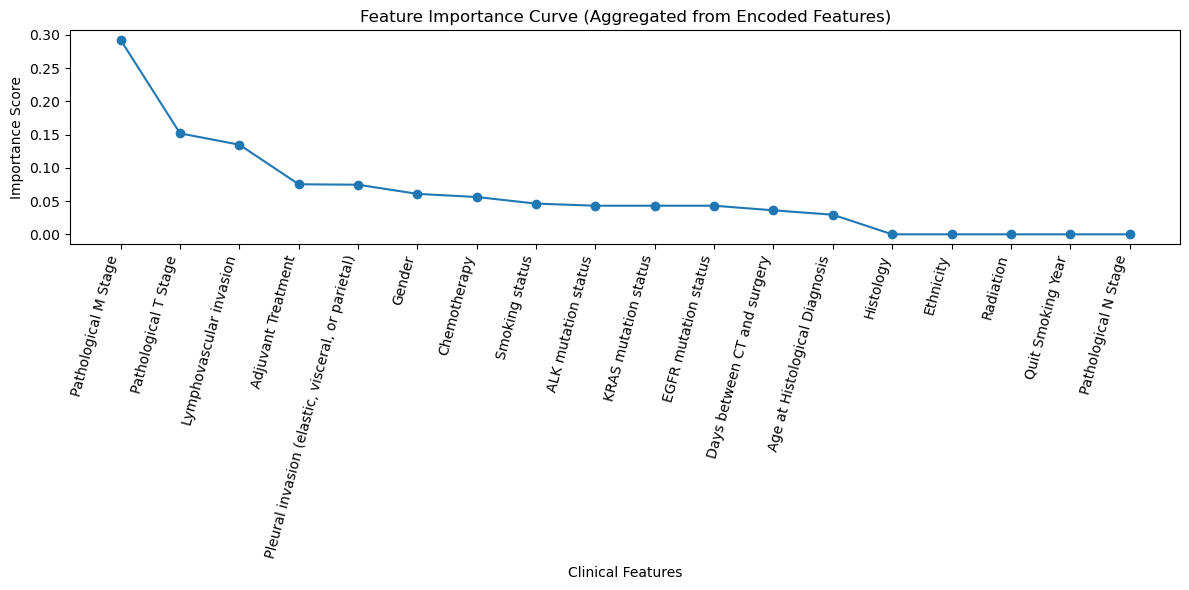

In [51]:
# map encoded importance
importance_df = pd.DataFrame({
    "feature": encoded_columns,
    "importance": importances
})

# compute grouped importance
original_importance = {}

for original_feature, encoded_list in feature_groups.items():
    total_importance = importance_df[importance_df['feature'].isin(encoded_list)]['importance'].sum()
    original_importance[original_feature] = total_importance

# convert to DataFrame
final_df = pd.DataFrame(original_importance.items(), columns=["Original Feature", "Importance"])
final_df = final_df.sort_values("Importance", ascending=False)
print(final_df)

# -------------------------------
# CORRECT PLOT CODE
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(final_df["Original Feature"], final_df["Importance"], marker='o')
plt.xticks(rotation=75, ha='right')
plt.xlabel("Clinical Features")
plt.ylabel("Importance Score")
plt.title("Feature Importance Curve (Aggregated from Encoded Features)")
plt.tight_layout()
plt.show()


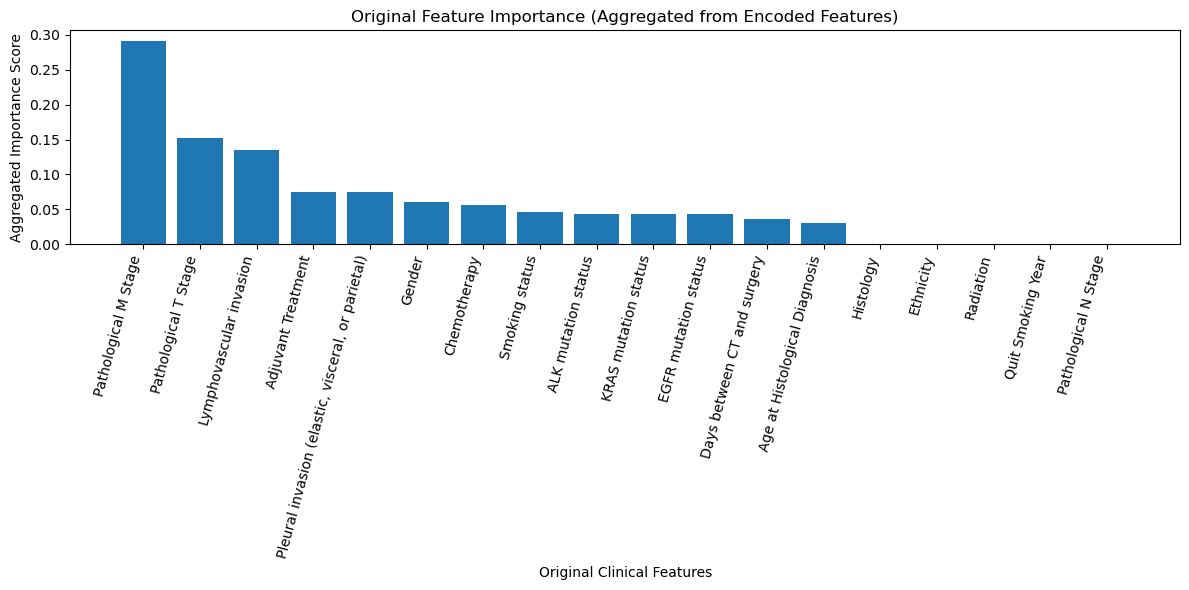

In [52]:
plt.figure(figsize=(12, 6))
plt.bar(final_df["Original Feature"], final_df["Importance"])
plt.xticks(rotation=75, ha='right')
plt.xlabel("Original Clinical Features")
plt.ylabel("Aggregated Importance Score")
plt.title("Original Feature Importance (Aggregated from Encoded Features)")
plt.tight_layout()
plt.show()